In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.shape

(10841, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#Drop the rows having null values in the Rating field
data1 = data[-data.Rating.isnull()]

#Check the shape of the dataframe
data1.shape

(9367, 13)

In [13]:
# Check the number of nulls in the Rating field again to cross-verify
data1.Rating.isnull().sum()

0

In [15]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [16]:
#Inspect the nulls in the Android Version column
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
#Drop the row having shifted values
data1 = data1[-(data1['Android Ver'].isnull()& (data1.Category == '1.9'))]
#Check the nulls againin Android version column to cross-verify
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [19]:
#Check the most common value in the Android version column
data1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [20]:
#Fill up the nulls in the Android Version column with the above value
#inp1['Android Ver'].mode()[0]
data1['Android Ver'] = data1['Android Ver'].fillna(data1['Android Ver'].mode()[0])

In [21]:
#Check the nulls in the Android version column again to cross-verify
data1['Android Ver'].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [23]:
#Check the nulls in the entire dataframe again
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [24]:
#Check the most common value in the Current version column
data1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [25]:
#Replace the nulls in the Current version column with the above value
#inp1['Current Ver'].mode()[0]
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])

In [26]:
data1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [27]:
#Replace the nulls in the Current version column with the above value
#inp1['Current Ver'].mode()[0]
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])

In [29]:
data1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [31]:
# Question : Check the most common value in the Current version column again
data1['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [32]:
#Check the datatypes of all the columns 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [33]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
data1[data1['Current Ver']==data1['Current Ver'].mode()[0]]['Price'].mean()

TypeError: Could not convert string '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.99000000000000000000000000000000000000000000000000000000000$3.4900000000000000000000000000000$2.99000$2.990$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000$4.9900000000000000000000000000$3.99$4.99$7.490000$6.99$3.99$2.49$3.99$3.99$3.99$3.9900000000$6.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.9500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.490000000000000000000000000000000000000000000000000000000$5.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.9900000000000000$8.990000000000000$4.99$5.9900000000$1.9900000000$4.990000$2.990$2.99000000000000000000000$2.990$2.49000000000$3.99000000000000000000000000$2.500$1.99000000$1.49$0.99000000000000000000000000000000000000000000000000000000000000$2.4900000000$4.99000000$4.990$11.990000$1.99000$4.99000$2.490000000000000000000000000$5.490$3.95000$1.49000$5.9900000000000000000$0.990$2.99$3.99$3.90$2.9900000000000000000000000000$3.990000000000000000000$4.990000000000$12.990000000000000000000000000000000$12.99000000000$3.99000000000000$2.95000000000000000000000000000000000000000$4.99000000$2.99000000000000$1.9900000000000000$2.99000$8.990$2.99000000000' to numeric

In [35]:
#Analyse the Price column to check the issue
data1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [36]:
#Write the function to make the changes
data1.Price = data1.Price.apply(lambda x: 0 if x =='0' else float(x[1:]))

In [37]:
#Verify the dtype of Price once again
data1.Price.dtype

dtype('float64')

In [39]:
data1.Price.value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

In [41]:
#Analyse the Reviews column
data1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [42]:
#Change the dtype of this column
data1.Reviews =  data1.Reviews.astype("int32")

#Check the quantitative spread of this dataframe
data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [43]:
#Analyse the Installs Column
data1.Installs.head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [44]:
#Analyse the Installs Column
data1.Installs.head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [45]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
def clean_installs(val):
    return int(val.replace(",","").replace("+", ""))

In [46]:
type(clean_installs('3,000,000++'))

int

In [48]:
data1.Installs = data1.Installs.apply(clean_installs)

In [49]:
data1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [50]:
data1.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.789744e+07,0.960928
std,0.515219,3.144042e+06,9.123822e+07,15.816585
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [51]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

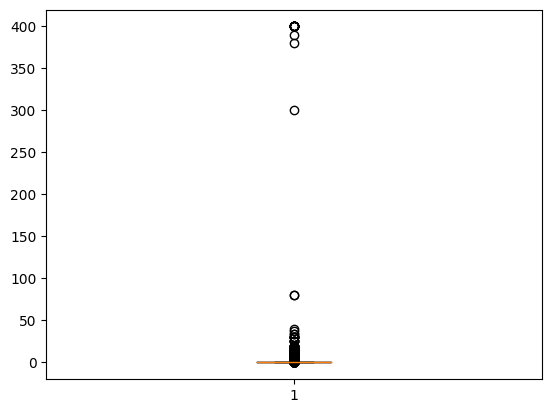

In [53]:
#Create a box plot for the price column
plt.boxplot(data1.Price)
plt.show()

In [55]:
#Check the apps with price more than 200
data1[data1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<Axes: >

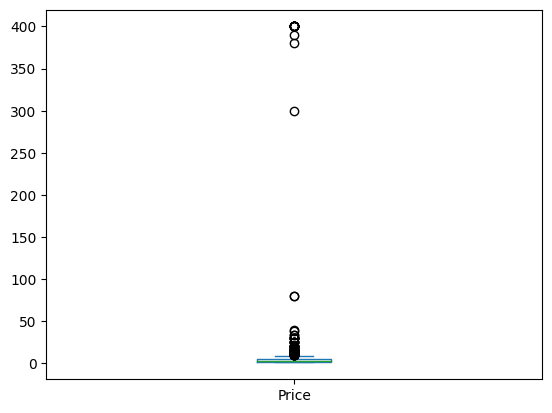

In [56]:
#Create a box plot for paid apps
data1[data1.Price>0].Price.plot.box()

In [58]:
#Clean the Price column again
data1 = data1[data1.Price<=30]
data1.shape

(9345, 13)

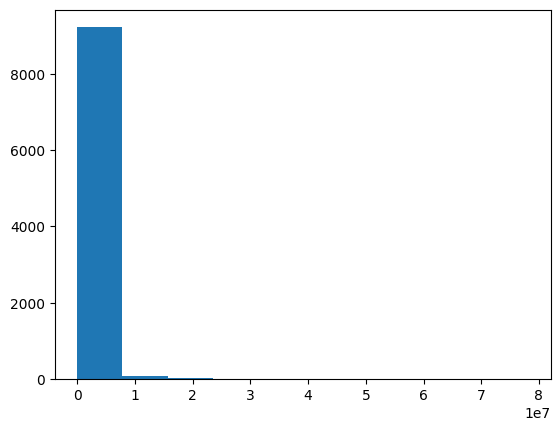

In [59]:
#Create a histogram of the Reviews
plt.hist(data1.Reviews)
plt.show()

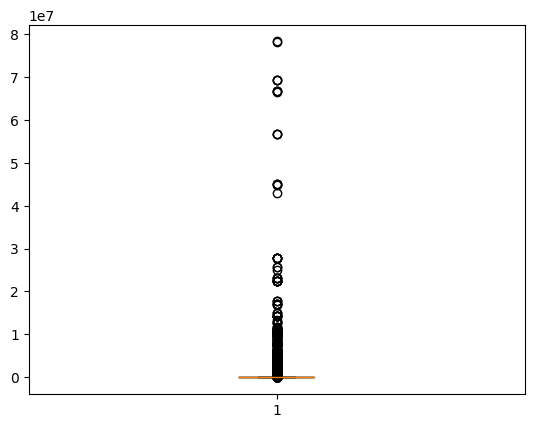

In [60]:
#Create a boxplot of the Reviews column
plt.boxplot(data1.Reviews)
plt.show()

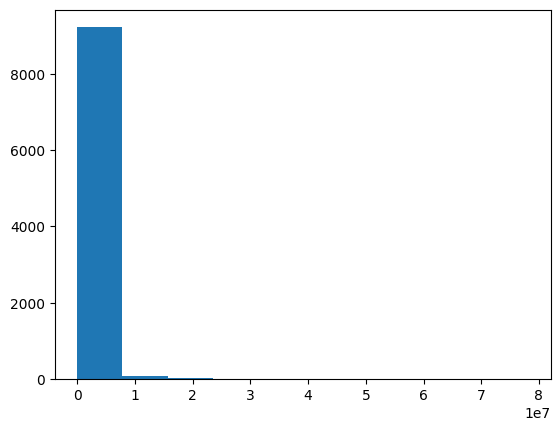

In [61]:
#Question - Create a histogram again and check the peaks
plt.hist(data1.Reviews)
plt.show()

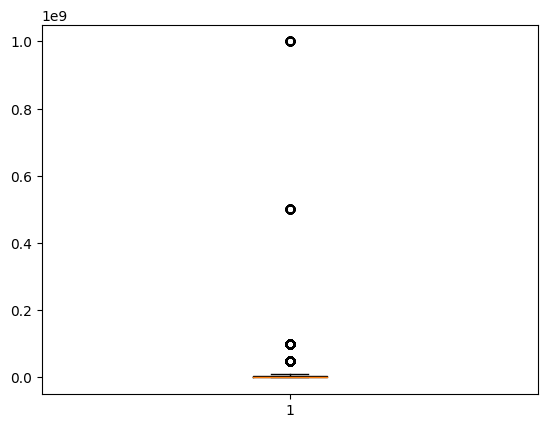

In [62]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(data1.Installs)
plt.show()

In [63]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = data1[data1.Installs <= 100000000] 
inp1.shape

(9215, 13)

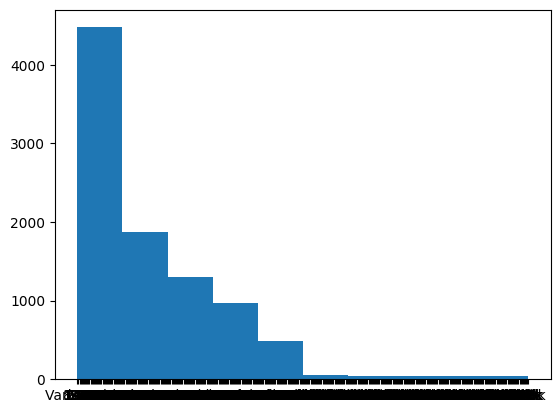

In [64]:
#Plot a histogram for Size as well.
plt.hist(data1.Size)
plt.show()

In [65]:
data1.Size.describe()

count                   9345
unique                   413
top       Varies with device
freq                    1637
Name: Size, dtype: object